
# IBM Capstone Final Project

## Introduction

# Section 1 - Set-Up

### Import Libraries

First, we will import all of the libraries into the Jupyter Notebook.

In [1]:
import pandas as pd

"pandas" is a software library writer for the Python programming language for data manipulation and analysis.  In particular, it offers data structures and operations for manipulating numerical tables and time series.

In [2]:
import numpy as np

NumPy is a software library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [3]:
import requests

Requests is a Python HTTP library, released under the Apache License 2.0.  The goal of the project is to make HTTP requests simpler and more human-friendly.

In [4]:
!pip install geocoder
import geocoder

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 10.0 MB/s eta 0:00:01


Simple and consistent geocoding library written in Python.  Deals with a multitude of geocoding providers, such as Google, Bing, OSM & more.

In [5]:
from geopy.geocoders import Nominatim

A tool to search OSM data by name and address and to generate synthetic address of OSM points (reverse geocoding).

In [6]:
!pip install folium
import folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 7.0 MB/s  eta 0:00:01


Library that builds on the data wrangling strengths of the Python ecosystem.  Simplifies data visualization into interactive leaflet maps, enabling both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markets on the map.  The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen

In [7]:
import os

A module that provides a portable way of using operating system dependent functionality.

In [8]:
import seaborn as sns

A Python data visualization library based on matplotlib.  It provides a high-level interface for drawing informative statistical graphics.

In [9]:
!pip install matplotlib
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


matplotlib - A comprehensive library for creating static, animated, and interactive visualizations in Python. 

matplotlib.cm - Built-in colormaps, colormap handling utilities, and the ScalarMappable mixin.

matplotlib.colors - A module for converting numbers or color arguments to RGB or RGBA.  This module includes functions and classes for color specification conversions, and for mapping numbers to colors in a 1-D array of colors called a colormap.

matplotlib.pyplot - A state-based interface to matplotlib, mainly intended for interactive plots and simple cases of programmic plot generation

-----------------

### Set-Up Objects

In [10]:
def getVenueInfo(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            Client_ID, 
            Client_Secret, 
            Version, 
            lat, 
            lng, 
            radius
            )
 
        results = requests.get(url).json()["response"]['groups'][0]['items']

        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['categories'][0]['name']) for v in results])

    venue_info = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venue_info.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue',  
                  'Venue_Id', 
                  'Venue Category']
    
    return(venue_info)

This code passes through parameters, credentials, and requests to the FourSquare API and receives data back from the database.

In [11]:
# The code was removed by Watson Studio for sharing.

This code (within a hidden cell) accesses files within the IBM Cloud Object Storage.  It wil lbe used to import the CSV data files into the Jupyter Notebook for the project.

-------------

### Import Credentials

In [12]:
Client_ID = 'NF2Q0LRPBUKMT05Q5TGFPR1VDDZBTIJJJZG1HOSPPPDFIFZR'
Client_Secret = 'ETDO0MGXE0GN53QCE54ZZKJSCSLMWGETWSWHN0DOCS4HYTPY'
Version = '20180605'

print('Your credentials:')
print('Client_ID: ' + Client_ID)
print('Client_Secret: ' + Client_Secret)

Your credentials:
Client_ID: NF2Q0LRPBUKMT05Q5TGFPR1VDDZBTIJJJZG1HOSPPPDFIFZR
Client_Secret: ETDO0MGXE0GN53QCE54ZZKJSCSLMWGETWSWHN0DOCS4HYTPY


---------------

## Section 2 - Data Manipulation

### Import Data

In [13]:
body = client_9f837708dc0847d6b7b5b0bf63471805.get_object(Bucket='courseracaptone-donotdelete-pr-iyqjhyotr1bbwt',Key='US-CITY-STATE.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_citystate = pd.read_csv(body)
df_citystate.describe

<bound method NDFrame.describe of        Zip Code State          City
0         55795    MN  Willow River
1         45388    OH     Yorkshire
2         39483    MS      Foxworth
3         31503    GA      Waycross
4         45833    OH       Delphos
...         ...   ...           ...
43186     25612    WV      Chauncey
43187     59444    MT        Galata
43188     60532    IL         Lisle
43189     61638    IL        Peoria
43190     85326    AZ       Buckeye

[43191 rows x 3 columns]>

This data source contains 'Zip Code', 'State', 'City'

In [14]:
body = client_9f837708dc0847d6b7b5b0bf63471805.get_object(Bucket='courseracaptone-donotdelete-pr-iyqjhyotr1bbwt',Key='US-COORDINATES.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_coordinates = pd.read_csv(body)
df_coordinates.describe

<bound method NDFrame.describe of        Zip Code   Latitude   Longitude
0         55795  46.317812  -92.843150
1         45388  40.328535  -84.479380
2         39483  31.218509  -89.907610
3         31503  31.205194  -82.375340
4         45833  40.841409  -84.341780
...         ...        ...         ...
43186     25612  37.766620  -81.987550
43187     59444  48.635319 -111.240830
43188     60532  41.789079  -88.085360
43189     61638  40.796887  -89.611146
43190     85326  33.354418 -112.569410

[43191 rows x 3 columns]>

This data source contains 'Zip Code', 'Latitude', 'Longitude'

In [15]:
df_citystate

,Zip Code,State,City
0,55795,MN,Willow River
1,45388,OH,Yorkshire
2,39483,MS,Foxworth
3,31503,GA,Waycross
4,45833,OH,Delphos
...,...,...,...
43186,25612,WV,Chauncey
43187,59444,MT,Galata
43188,60532,IL,Lisle
43189,61638,IL,Peoria


Viewing the format and data of df_citystate.

In [16]:
df_coordinates

,Zip Code,Latitude,Longitude
0,55795,46.317812,-92.843150
1,45388,40.328535,-84.479380
2,39483,31.218509,-89.907610
3,31503,31.205194,-82.375340
4,45833,40.841409,-84.341780
...,...,...,...
43186,25612,37.766620,-81.987550
43187,59444,48.635319,-111.240830
43188,60532,41.789079,-88.085360
43189,61638,40.796887,-89.611146


Viewing the format and data of df_coordinates.

In [17]:
print("df_citystate.shape is",df_citystate.shape)
print("df_coordinates.shape is",df_coordinates.shape)

df_citystate.shape is (43191, 3)
df_coordinates.shape is (43191, 3)


### Manipulate Data

In [18]:
df = df_citystate.join(df_coordinates.set_index('Zip Code'), on='Zip Code', how='inner')
df

,Zip Code,State,City,Latitude,Longitude
0,55795,MN,Willow River,46.317812,-92.843150
1,45388,OH,Yorkshire,40.328535,-84.479380
2,39483,MS,Foxworth,31.218509,-89.907610
3,31503,GA,Waycross,31.205194,-82.375340
4,45833,OH,Delphos,40.841409,-84.341780
...,...,...,...,...,...
43186,25612,WV,Chauncey,37.766620,-81.987550
43187,59444,MT,Galata,48.635319,-111.240830
43188,60532,IL,Lisle,41.789079,-88.085360
43189,61638,IL,Peoria,40.796887,-89.611146


Combine the datasets together, joining on Zip Code

In [19]:
df.shape

(43191, 5)

In [20]:
df = df[df["State"] == "NY"]
df

,Zip Code,State,City,Latitude,Longitude
12,13758,NY,East Pharsalia,42.583518,-75.721931
24,11757,NY,Lindenhurst,40.690049,-73.374420
64,13310,NY,Bouckville,42.888210,-75.568800
94,14812,NY,Beaver Dams,42.286649,-76.976600
150,13562,NY,Hermon,44.465307,-75.230195
...,...,...,...,...,...
43098,14203,NY,Buffalo,42.880107,-78.869900
43102,14738,NY,Frewsburg,42.038500,-79.076220
43124,11510,NY,Baldwin,40.654112,-73.609500
43170,13606,NY,Adams Center,43.871728,-76.007930


Parse the dataset to keep only NY State values

In [21]:
df = df.sort_values(['Zip Code'])
df

,Zip Code,State,City,Latitude,Longitude
33389,501,NY,Holtsville,40.922326,-72.637078
21163,544,NY,Holtsville,40.922326,-72.637078
1792,6390,NY,Fishers Island,41.261936,-72.007080
33959,10001,NY,New York,40.750742,-73.996530
20046,10002,NY,New York,40.717040,-73.987000
...,...,...,...,...,...
25504,14902,NY,Elmira,42.147285,-76.750888
6833,14903,NY,Elmira,42.129274,-76.844970
26667,14904,NY,Elmira,42.072024,-76.803930
12317,14905,NY,Elmira,42.087824,-76.836860


Sort by Zip Code desc, to make it look prettier for the naked eye

In [22]:
df = df.reset_index()
df

,index,Zip Code,State,City,Latitude,Longitude
0,33389,501,NY,Holtsville,40.922326,-72.637078
1,21163,544,NY,Holtsville,40.922326,-72.637078
2,1792,6390,NY,Fishers Island,41.261936,-72.007080
3,33959,10001,NY,New York,40.750742,-73.996530
4,20046,10002,NY,New York,40.717040,-73.987000
...,...,...,...,...,...,...
2276,25504,14902,NY,Elmira,42.147285,-76.750888
2277,6833,14903,NY,Elmira,42.129274,-76.844970
2278,26667,14904,NY,Elmira,42.072024,-76.803930
2279,12317,14905,NY,Elmira,42.087824,-76.836860


Reset the index numbers so if we would like to refer to a specific row later on, we can.

In [23]:
df.drop(['index'], axis = 'columns', inplace = True)
df

,Zip Code,State,City,Latitude,Longitude
0,501,NY,Holtsville,40.922326,-72.637078
1,544,NY,Holtsville,40.922326,-72.637078
2,6390,NY,Fishers Island,41.261936,-72.007080
3,10001,NY,New York,40.750742,-73.996530
4,10002,NY,New York,40.717040,-73.987000
...,...,...,...,...,...
2276,14902,NY,Elmira,42.147285,-76.750888
2277,14903,NY,Elmira,42.129274,-76.844970
2278,14904,NY,Elmira,42.072024,-76.803930
2279,14905,NY,Elmira,42.087824,-76.836860


Old Index Numbers column deleted, as it is no longer relevant

### Visualize/Evaluate Data

In [24]:
address = 'New York, New York'

geolocator = Nominatim(user_agent="new_york")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of New York are {},{}'.format(latitude, longitude))

The geographical coordinates of New York are 40.7127281,-74.0060152


A Latitude, Longitude reference if we wanted to use the coordinates for our mapping function.

In [25]:
map_NewYork = folium.Map(location=[latitude, longitude], zoom_start=11)

for latitude, longitude, city in zip(df['Latitude'], df['Longitude'], df['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='red',
        fill=True
    ).add_to(map_NewYork)

map_NewYork

A visual map to see the different locations within the NY dataset 

### Readjust Data

In [26]:
body = client_9f837708dc0847d6b7b5b0bf63471805.get_object(Bucket='courseracaptone-donotdelete-pr-iyqjhyotr1bbwt',Key='NY-COUNTY.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_ny_county = pd.read_csv(body)
df_ny_county.head()

,Zip Code,County
0,501,Suffolk
1,544,Suffolk
2,6390,Suffolk
3,10001,New York
4,10002,New York


Import information on Zip Codes and County Names.

Selected New York, Queens, Nassau, and Suffolk as those are the closest ones on Long Island (original destination)

In [27]:
df = df.join(df_ny_county.set_index('Zip Code'), on='Zip Code', how='inner')
df

,Zip Code,State,City,Latitude,Longitude,County
0,501,NY,Holtsville,40.922326,-72.637078,Suffolk
0,501,NY,Holtsville,40.922326,-72.637078,NaN
1,544,NY,Holtsville,40.922326,-72.637078,Suffolk
1,544,NY,Holtsville,40.922326,-72.637078,NaN
2,6390,NY,Fishers Island,41.261936,-72.007080,Suffolk
...,...,...,...,...,...,...
2278,14904,NY,Elmira,42.072024,-76.803930,Chemung
2278,14904,NY,Elmira,42.072024,-76.803930,NaN
2279,14905,NY,Elmira,42.087824,-76.836860,Chemung
2279,14905,NY,Elmira,42.087824,-76.836860,NaN


Joining "County" to the rest of the database on the similar column "Zip Code"

In [28]:
df = df.reset_index()
df.drop(['index'], axis = 'columns', inplace = True)
df

,Zip Code,State,City,Latitude,Longitude,County
0,501,NY,Holtsville,40.922326,-72.637078,Suffolk
1,501,NY,Holtsville,40.922326,-72.637078,NaN
2,544,NY,Holtsville,40.922326,-72.637078,Suffolk
3,544,NY,Holtsville,40.922326,-72.637078,NaN
4,6390,NY,Fishers Island,41.261936,-72.007080,Suffolk
...,...,...,...,...,...,...
4383,14904,NY,Elmira,42.072024,-76.803930,Chemung
4384,14904,NY,Elmira,42.072024,-76.803930,NaN
4385,14905,NY,Elmira,42.087824,-76.836860,Chemung
4386,14905,NY,Elmira,42.087824,-76.836860,NaN


Same song and dance for resetting the index

-----------

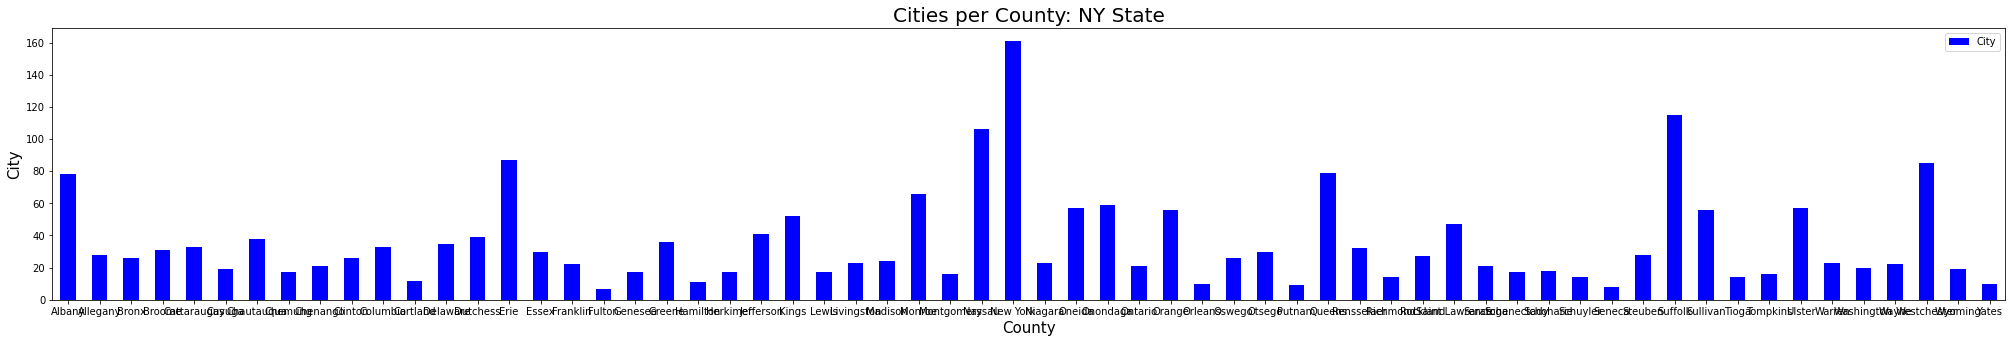

In [29]:
clr = "blue"
df.groupby('County')['City'].count().plot.bar(figsize=(35,5), color=clr)
plt.title('Cities per County: NY State', fontsize = 20)
plt.xlabel('County', fontsize = 15)
plt.ylabel('City',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

A visual to see how many cities we can expect for each County

In [30]:
n = len(pd.unique(df['County']))
n

63

In [31]:
df.dropna()

,Zip Code,State,City,Latitude,Longitude,County
0,501,NY,Holtsville,40.922326,-72.637078,Suffolk
2,544,NY,Holtsville,40.922326,-72.637078,Suffolk
4,6390,NY,Fishers Island,41.261936,-72.007080,Suffolk
5,10001,NY,New York,40.750742,-73.996530,New York
7,10002,NY,New York,40.717040,-73.987000,New York
...,...,...,...,...,...,...
4379,14902,NY,Elmira,42.147285,-76.750888,Chemung
4381,14903,NY,Elmira,42.129274,-76.844970,Chemung
4383,14904,NY,Elmira,42.072024,-76.803930,Chemung
4385,14905,NY,Elmira,42.087824,-76.836860,Chemung


Since we will be sorting by County, we are dropping any values in "County" that were blank

In [32]:
df_Suffolk = df[df["County"] == 'Suffolk']
df_Nassau = df[df["County"] == 'Nassau']
df_Queens = df[df["County"] == 'Queens']
df_NewYork = df[df["County"] == 'New York']

In [33]:
df_NewYork = df_NewYork.append(df_Suffolk)
df_NewYork = df_NewYork.append(df_Nassau)
df_NewYork = df_NewYork.append(df_Queens)

Combining "New York", "Queens", "Nassau", "Suffolk" into one singular dataframe.

(Note: Originally, I wanted to pull all cities/counties to analyze ALL of New York State.  Unfortunately, the FourSquare API has a limited number of pulls per day and searching ALL of New York State would exceed the Free version limitations.  So, we are parsing the data to only four counties to allow for FourSquare API pulls.)

In [34]:
df_NewYork

,Zip Code,State,City,Latitude,Longitude,County
5,10001,NY,New York,40.750742,-73.996530,New York
7,10002,NY,New York,40.717040,-73.987000,New York
9,10003,NY,New York,40.732509,-73.989350,New York
11,10005,NY,New York,40.706019,-74.008580,New York
13,10006,NY,New York,40.707904,-74.013420,New York
...,...,...,...,...,...,...
1133,11692,NY,Arverne,40.592939,-73.795680,Queens
1135,11693,NY,Far Rockaway,40.596959,-73.819780,Queens
1137,11694,NY,Rockaway Park,40.576490,-73.847210,Queens
1139,11695,NY,Far Rockaway,40.651378,-73.870779,Queens


In [35]:
df = df_NewYork

--------------

## Section 3 - FourSquare API

### Run API

In [36]:
ny_venues = getVenueInfo(df['City'], df['Latitude'], df['Longitude'])

New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
N

Pulling Venue Data from the FourSquare API

-----------

## Section 4 - Analysis

### Clean Results

In [37]:
ny_venues = ny_venues.join(df_citystate.set_index('City'), on='City', how='inner')
ny_venues = ny_venues.join(df_ny_county.set_index('Zip Code'), on='Zip Code', how='inner')
ny_venues = ny_venues.dropna()
df = ny_venues.reset_index()
df.drop(['index'], axis = 'columns', inplace = True)
df

,City,Latitude,Longitude,Venue,Venue_Id,Venue Category,Zip Code,State,County
0,New York,40.750742,-73.99653,Moynihan Train Hall,578e6500cd10fae9c60a2a8a,Train Station,10170,NY,New York
1,New York,40.750742,-73.99653,New York Pizza Suprema,4a639f9ff964a52077c51fe3,Pizza Place,10170,NY,New York
2,New York,40.750742,-73.99653,You Should Be Dancing…..! / Club 412,4aab421ef964a520515920e3,Dance Studio,10170,NY,New York
3,New York,40.750742,-73.99653,Blue Bottle Coffee,605cfd7bcb1dfd712a36732b,Coffee Shop,10170,NY,New York
4,New York,40.750742,-73.99653,Music Choice,4b758e78f964a520ed132ee3,Music Venue,10170,NY,New York
...,...,...,...,...,...,...,...,...,...
791556,Breezy Point,40.560167,-73.90891,Ridgewood Savings Bank,4f8595b4e4b08d4037f8115e,Bank,11697,NY,Queens
791557,Breezy Point,40.560167,-73.90891,Winter Stores,4e1f3ec6aeb7fe88ace48b33,Convenience Store,11697,NY,Queens
791558,Breezy Point,40.560167,-73.90891,Country Heart Cooking,4c54758272cf0f47c2f099d4,Diner,11697,NY,Queens
791559,Breezy Point,40.560167,-73.90891,St. Thomas Moore Gymnasium,4eb56e8ee30006eb121e574a,Basketball Court,11697,NY,Queens


### Evalutate

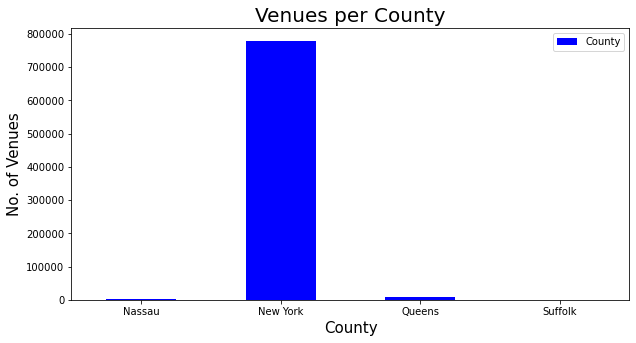

In [38]:
df.groupby('County')['County'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Venues per County', fontsize = 20)
plt.xlabel('County', fontsize = 15)
plt.ylabel('No. of Venues', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

Taking a look at the "Venues per County."  Also realizing that some cities may have had too large of a radius, so venues can be counted multiple times.

### Readjust

In [39]:
df = df.drop_duplicates(subset=['Venue'])
df

,City,Latitude,Longitude,Venue,Venue_Id,Venue Category,Zip Code,State,County
0,New York,40.750742,-73.99653,Moynihan Train Hall,578e6500cd10fae9c60a2a8a,Train Station,10170,NY,New York
1,New York,40.750742,-73.99653,New York Pizza Suprema,4a639f9ff964a52077c51fe3,Pizza Place,10170,NY,New York
2,New York,40.750742,-73.99653,You Should Be Dancing…..! / Club 412,4aab421ef964a520515920e3,Dance Studio,10170,NY,New York
3,New York,40.750742,-73.99653,Blue Bottle Coffee,605cfd7bcb1dfd712a36732b,Coffee Shop,10170,NY,New York
4,New York,40.750742,-73.99653,Music Choice,4b758e78f964a520ed132ee3,Music Venue,10170,NY,New York
...,...,...,...,...,...,...,...,...,...
791556,Breezy Point,40.560167,-73.90891,Ridgewood Savings Bank,4f8595b4e4b08d4037f8115e,Bank,11697,NY,Queens
791557,Breezy Point,40.560167,-73.90891,Winter Stores,4e1f3ec6aeb7fe88ace48b33,Convenience Store,11697,NY,Queens
791558,Breezy Point,40.560167,-73.90891,Country Heart Cooking,4c54758272cf0f47c2f099d4,Diner,11697,NY,Queens
791559,Breezy Point,40.560167,-73.90891,St. Thomas Moore Gymnasium,4eb56e8ee30006eb121e574a,Basketball Court,11697,NY,Queens


Removed duplicate venues

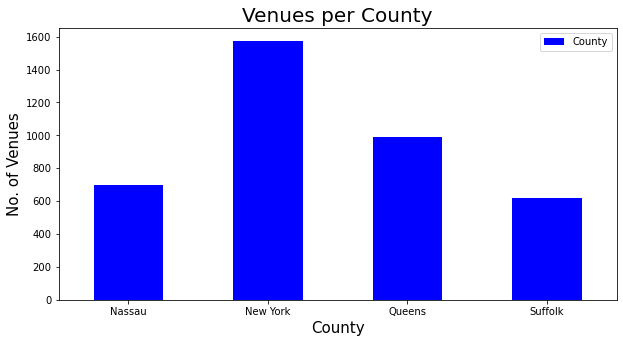

In [40]:
df.groupby('County')['County'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Venues per County', fontsize = 20)
plt.xlabel('County', fontsize = 15)
plt.ylabel('No. of Venues', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

Checking on the current venue allocation.  This appears to be more accurate.

### Filter

In [41]:
df_Bagel = df[df['Venue Category']=='Bagel Shop']
df_Bagel = df_Bagel.reset_index()
df_Bagel.drop(['index'], axis = 'columns', inplace = True)
df_Bagel

,City,Latitude,Longitude,Venue,Venue_Id,Venue Category,Zip Code,State,County
0,New York,40.717040,-73.98700,Kossar's Bialys,4a300de4f964a5200c991fe3,Bagel Shop,10170,NY,New York
1,New York,40.706019,-74.00858,Leo's Bagels,4a59f31df964a52095b91fe3,Bagel Shop,10170,NY,New York
2,New York,40.714754,-74.00721,Zucker's Bagels & Smoked Fish,4a4baaf8f964a52091ac1fe3,Bagel Shop,10170,NY,New York
3,New York,40.727093,-73.97864,Tompkins Square Bagels,4d38f531a558a1cde4c1cd43,Bagel Shop,10170,NY,New York
4,New York,40.725960,-73.99834,Sadelle's,55b7dd92498e88a1ea18d3f8,Bagel Shop,10170,NY,New York
5,New York,40.759015,-73.96732,NY Jumbo Bagels,52ec3904498e4e6796d1b39c,Bagel Shop,10170,NY,New York
6,New York,40.786387,-73.97709,Barney Greengrass,3fd66200f964a52046e81ee3,Bagel Shop,10170,NY,New York
7,New York,40.798502,-73.96811,Absolute Bagels,4a06f7fdf964a5200f731fe3,Bagel Shop,10170,NY,New York
8,New York,40.802853,-73.95471,Bo's Bagels,55c6073a498e157e0657077e,Bagel Shop,10170,NY,New York
9,New York,40.818151,-73.94351,Acts III bagels,54bf1905498ea4735eac912b,Bagel Shop,10170,NY,New York


Pulling all Bagel Shops for all areas in New York

In [42]:
df_Bagel.shape

(55, 9)

(Note: Originally, we had a code that pulled the Ratings/Tips/Etc. from each Venue.  We would push in the Venue ID and return the Ratings/Tips/Etc. through the API and match the results up.  Unfortunately, due to a similar issue from before, we can only run so many calls against the FourSquare API per day.  So, the ratings were downloaded from a different day and saved as a CSV.  We will re-upload the CSV later.)

In [43]:
df_NYC_Bagel = df_Bagel[df_Bagel["County"] == 'New York']

Parse the Dataframe to only be "New York" County

In [44]:
df_NYC_Bagel

,City,Latitude,Longitude,Venue,Venue_Id,Venue Category,Zip Code,State,County
0,New York,40.717040,-73.98700,Kossar's Bialys,4a300de4f964a5200c991fe3,Bagel Shop,10170,NY,New York
1,New York,40.706019,-74.00858,Leo's Bagels,4a59f31df964a52095b91fe3,Bagel Shop,10170,NY,New York
2,New York,40.714754,-74.00721,Zucker's Bagels & Smoked Fish,4a4baaf8f964a52091ac1fe3,Bagel Shop,10170,NY,New York
3,New York,40.727093,-73.97864,Tompkins Square Bagels,4d38f531a558a1cde4c1cd43,Bagel Shop,10170,NY,New York
4,New York,40.725960,-73.99834,Sadelle's,55b7dd92498e88a1ea18d3f8,Bagel Shop,10170,NY,New York
5,New York,40.759015,-73.96732,NY Jumbo Bagels,52ec3904498e4e6796d1b39c,Bagel Shop,10170,NY,New York
6,New York,40.786387,-73.97709,Barney Greengrass,3fd66200f964a52046e81ee3,Bagel Shop,10170,NY,New York
7,New York,40.798502,-73.96811,Absolute Bagels,4a06f7fdf964a5200f731fe3,Bagel Shop,10170,NY,New York
8,New York,40.802853,-73.95471,Bo's Bagels,55c6073a498e157e0657077e,Bagel Shop,10170,NY,New York
9,New York,40.818151,-73.94351,Acts III bagels,54bf1905498ea4735eac912b,Bagel Shop,10170,NY,New York


### Append Ratings

In [45]:
body = client_9f837708dc0847d6b7b5b0bf63471805.get_object(Bucket='courseracaptone-donotdelete-pr-iyqjhyotr1bbwt',Key='BAGEL-RATINGS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Ratings = pd.read_csv(body)
df_Ratings.head()


,Venue,Rating,Ratings Count,Tips
0,Kossar's Bialys,8.6,313.0,69.0
1,Leo's Bagels,8.3,650.0,174.0
2,Zucker's Bagels & Smoked Fish,8.5,881.0,197.0
3,Tompkins Square Bagels,9.0,1448.0,357.0
4,Sadelle's,9.1,982.0,182.0


(Note: Originally, we had a code that pulled the Ratings/Tips/Etc. from each Venue.  We would push in the Venue ID and return the Ratings/Tips/Etc. through the API and match the results up.  Unfortunately, due to a similar issue from before, we can only run so many calls against the FourSquare API per day.  So, the ratings were downloaded from a different day and saved as a CSV.  We will re-upload the CSV later.)

In [46]:
df_NYC_Bagel = df_NYC_Bagel.join(df_Ratings.set_index('Venue'), on='Venue', how='inner')
df_NYC_Bagel = df_NYC_Bagel.dropna()
df = df_NYC_Bagel.reset_index()
df.drop(['index'], axis = 'columns', inplace = True)
df

,City,Latitude,Longitude,Venue,Venue_Id,Venue Category,Zip Code,State,County,Rating,Ratings Count,Tips
0,New York,40.717040,-73.98700,Kossar's Bialys,4a300de4f964a5200c991fe3,Bagel Shop,10170,NY,New York,8.6,313.0,69.0
1,New York,40.706019,-74.00858,Leo's Bagels,4a59f31df964a52095b91fe3,Bagel Shop,10170,NY,New York,8.3,650.0,174.0
2,New York,40.714754,-74.00721,Zucker's Bagels & Smoked Fish,4a4baaf8f964a52091ac1fe3,Bagel Shop,10170,NY,New York,8.5,881.0,197.0
3,New York,40.727093,-73.97864,Tompkins Square Bagels,4d38f531a558a1cde4c1cd43,Bagel Shop,10170,NY,New York,9.0,1448.0,357.0
4,New York,40.725960,-73.99834,Sadelle's,55b7dd92498e88a1ea18d3f8,Bagel Shop,10170,NY,New York,9.1,982.0,182.0
5,New York,40.759015,-73.96732,NY Jumbo Bagels,52ec3904498e4e6796d1b39c,Bagel Shop,10170,NY,New York,8.4,117.0,34.0
6,New York,40.786387,-73.97709,Barney Greengrass,3fd66200f964a52046e81ee3,Bagel Shop,10170,NY,New York,8.7,612.0,156.0
7,New York,40.798502,-73.96811,Absolute Bagels,4a06f7fdf964a5200f731fe3,Bagel Shop,10170,NY,New York,9.1,1107.0,296.0
8,New York,40.802853,-73.95471,Bo's Bagels,55c6073a498e157e0657077e,Bagel Shop,10170,NY,New York,9.0,105.0,19.0
9,New York,40.818151,-73.94351,Acts III bagels,54bf1905498ea4735eac912b,Bagel Shop,10170,NY,New York,7.4,11.0,3.0


Append the information to the DataFrame

In [47]:
df.describe()

,Latitude,Longitude,Zip Code,Rating,Ratings Count,Tips
count,16.000000,16.000000,16.0,16.000000,16.000000,16.000000
mean,40.766565,-73.973256,10170.0,8.375000,593.000000,141.187500
std,0.040719,0.023577,0.0,0.717867,499.073007,121.291505
min,40.706019,-74.008580,10170.0,6.400000,11.000000,3.000000
25%,40.726810,-73.991097,10170.0,8.225000,104.250000,23.500000
50%,40.767246,-73.974880,10170.0,8.450000,631.000000,165.000000
75%,40.799475,-73.953630,10170.0,9.000000,917.500000,197.500000
max,40.840686,-73.933590,10170.0,9.100000,1448.000000,357.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            16 non-null     object 
 1   Latitude        16 non-null     float64
 2   Longitude       16 non-null     float64
 3   Venue           16 non-null     object 
 4   Venue_Id        16 non-null     object 
 5   Venue Category  16 non-null     object 
 6   Zip Code        16 non-null     int64  
 7   State           16 non-null     object 
 8   County          16 non-null     object 
 9   Rating          16 non-null     float64
 10  Ratings Count   16 non-null     float64
 11  Tips            16 non-null     float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.6+ KB


### Output 1

In [49]:
Top_Bagels_List = df[['Venue','Rating']]
Top_Bagels_List.sort_values(by=['Rating'], inplace=True, ascending=False)
Top_Bagels_List = Top_Bagels_List.head(5)
Top_Bagels_List = Top_Bagels_List.reset_index()
Top_Bagels_List.drop(['index'], axis = 'columns', inplace = True)
Top_Bagels_List

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Venue,Rating
0,Sadelle's,9.1
1,Absolute Bagels,9.1
2,Tompkins Square Bagels,9.0
3,Bo's Bagels,9.0
4,Best Bagel & Coffee,9.0


Get a result of the Top 5 Rated Venues in New York

### Output 2

In [50]:
map_stats=df[['City','Latitude','Longitude','Rating','Venue','County']]
map_stats

,City,Latitude,Longitude,Rating,Venue,County
0,New York,40.717040,-73.98700,8.6,Kossar's Bialys,New York
1,New York,40.706019,-74.00858,8.3,Leo's Bagels,New York
2,New York,40.714754,-74.00721,8.5,Zucker's Bagels & Smoked Fish,New York
3,New York,40.727093,-73.97864,9.0,Tompkins Square Bagels,New York
4,New York,40.725960,-73.99834,9.1,Sadelle's,New York
5,New York,40.759015,-73.96732,8.4,NY Jumbo Bagels,New York
6,New York,40.786387,-73.97709,8.7,Barney Greengrass,New York
7,New York,40.798502,-73.96811,9.1,Absolute Bagels,New York
8,New York,40.802853,-73.95471,9.0,Bo's Bagels,New York
9,New York,40.818151,-73.94351,7.4,Acts III bagels,New York


In [51]:
ny_map = folium.Map(location=[40.706019, -74.00721], zoom_start=12)

rating = folium.map.FeatureGroup()

for lat, lng, in map_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [52]:
map_stats['Label']=map_stats['City']+', '+map_stats['County']+'('+map_stats['Rating'].map(str)+')'

for lat, lng, label in map_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        

ny_map.add_child(rating)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Visually show all Bagel Shop locations in County 'New York'